# EDA

## Initialization

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\anaconda\envs\geopandas_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import pandas as pd
import numpy as np
import sys
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import igraph

from geopandas import GeoDataFrame
from pyrosm import OSM

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
# Self-made modules
import helpers as hp

In [5]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Inputs

In [6]:
buildings_int_path = '../data/02_intermediate/buildings_data/'
plz_ags_csv = '../data/01_raw/zuordnung_plz_ort_landkreis.csv'

# Demographics
ags_living_csv = '../data/01_raw/de_living_2019.csv'
ags_population_csv = '../data/01_raw/de_population_2019.csv'

In [7]:
ags_living = pd.read_csv(ags_living_csv, 
                         sep = ';', 
                         encoding = 'cp1250', 
                         dtype= {'1_Auspraegung_Code':str},
                         low_memory = False)
ags_population = pd.read_csv(ags_population_csv, 
                             sep = ';', 
                             dtype= {'1_Auspraegung_Code':str},
                             encoding = 'cp1250', 
                             low_memory = False)

In [8]:
# Contain local AGS codes (no regional)
plz_ags = pd.read_csv(plz_ags_csv, dtype= {'plz': str, 'ags': str})

In [9]:
test='1059187'
test.zfill(8)

'01059187'

In [10]:
plz_ags[plz_ags.ags == '01059187']

,osm_id,ags,plz,bundesland
1522,1149234,01059187,24392,Schleswig-Holstein


## PLZ AGS EDA

In [11]:
plz_ags.head()

,osm_id,ags,plz,bundesland
0,1104550,08335001,78267,Baden-Württemberg
1,1255910,07235001,54298,Rheinland-Pfalz
2,62564,05334002,52062,Nordrhein-Westfalen
3,62564,05334002,52064,Nordrhein-Westfalen
4,62564,05334002,52066,Nordrhein-Westfalen


In [12]:
ags_bundesland = pd.DataFrame(plz_ags[['ags','bundesland']]
                              .drop_duplicates()
                              .groupby('bundesland')[['ags']]
                              .size()
                              .to_frame('ags_count')
                              .reset_index())

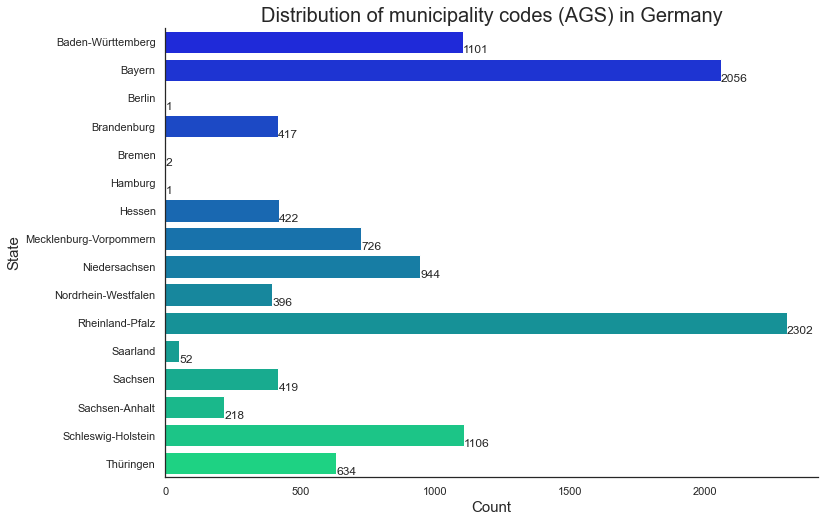

In [14]:
sns.set_style('white') 

g = sns.barplot(data = ags_bundesland,
                 y = 'bundesland',
                 x = 'ags_count',
                 palette = 'winter',
                 orient = 'h')

hp.show_values_on_bars(g, "h", 0.5)

plt.title('Distribution of municipality codes (AGS) in Germany', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('State', fontsize = 15)
sns.despine()

AGS Living

In [15]:
ags_living.rename(columns = {'1_Auspraegung_Code':'ags',
                            '1_Auspraegung_Label':'place',
                            '2_Auspraegung_Label':'indication',
                            '2_Merkmal_Label':'measurement_type'}, inplace = True)

In [16]:
# Filter to get only local AGS codes
ags_living = ags_living[ags_living.ags.isin(plz_ags.ags)]

In [17]:
ags_living.ags.nunique()

10689

AGS Population

In [18]:
ags_population.rename(columns = {'1_Auspraegung_Code':'ags',
                                 '1_Auspraegung_Label':'place',
                                 '2_Auspraegung_Label':'gender',
                                 '3_Auspraegung_Label':'age_group'}, inplace = True)

# Filter to get only local AGS codes
ags_population = ags_population[ags_population.ags.isin(plz_ags.ags)]

In [19]:
ags_population.ags.nunique()

10796

In [20]:
ags_population[ags_population.ags == '01004000'].head()

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,ags,place,2_Merkmal_Code,2_Merkmal_Label,2_Auspraegung_Code,gender,3_Merkmal_Code,3_Merkmal_Label,3_Auspraegung_Code,age_group,BEVSTD__Bevoelkerungsstand__Anzahl
162,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT000B03,unter 3 Jahre,2145
163,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT003B06,3 bis unter 6 Jahre,2167
164,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT006B10,6 bis unter 10 Jahre,2814
165,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT010B15,10 bis unter 15 Jahre,3726
166,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT015B18,15 bis unter 18 Jahre,2268
167,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT018B20,18 bis unter 20 Jahre,1893
168,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT020B25,20 bis unter 25 Jahre,4826
169,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT025B30,25 bis unter 30 Jahre,5098
170,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT030B35,30 bis unter 35 Jahre,5157
171,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT035B40,35 bis unter 40 Jahre,4657


## Plot examples

In [21]:
id = 10

In [22]:
boundary_id = '09184123'
df = pd.read_csv(os.path.join(buildings_int_path, f'buildings_ags_{boundary_id}.csv'))

In [23]:
df.shape

(3969, 18)

In [29]:
plot_df = df.groupby('building_types').size().to_frame('count').reset_index()
plot_df

,building_types,count
0,accessory_storage,328
1,accessory_supply,4
2,commercial,49
3,industrial,11
4,other,3
5,public,66
6,residential,2700
7,to_be_classified,808


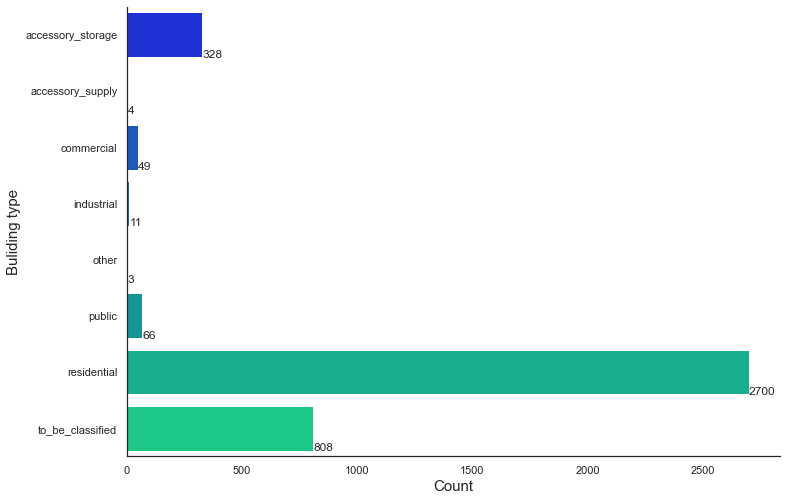

In [39]:
sns.set_style('white') 

g = sns.barplot(data = plot_df,
            x = 'count',
            y = 'building_types',
            palette = 'winter',
            orient = 'h')

hp.show_values_on_bars(g, "h", 0.5)

# plt.title('Distribution of municipality codes (AGS) in Germany', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Buliding type', fontsize = 15)
sns.despine()

## Get the number of residential buildings from officials

In [ ]:
ags_living['place'] = ags_living['place'].apply(lambda x: x.strip())

In [ ]:
# Total buildings in the area that are classified as "residentials"
official_res_count = int(ags_living[(ags_living.ags == boundary_id) &
                                    (ags_living.measurement_type == 'Wohngebäude nach Anzahl der Wohnungen') &
                                    (ags_living.indication == 'Insgesamt')].BAUNW9__Wohngebaeude__Anzahl.iloc[0])
official_res_count

In [ ]:
ags_place = ags_living[ags_living.ags == boundary_id].place.iloc[0]
ags_place

In [ ]:
# OSM residential buildings count
osm_count = len(df[df.building_types == 'residential'])
osm_unidentified_count = len(df[df.building_types == 'to_be_classified'])

In [ ]:
# differences in number
abs_diff = abs(osm_count-official_res_count)
# diff in percentage
pct_diff = round((abs_diff/official_res_count)*100,2)

In [ ]:
f'{abs_diff} buildings & {pct_diff}% diff'

# Diff dist

Get diff distribution of real residential buildings vs osm buildings

In [ ]:
res_diff_path = '../data/08_reporting/residential_diff.csv'

In [ ]:
res_diff = pd.read_csv(res_diff_path,
                      dtype = {'ags':str})

In [ ]:
res_diff = res_diff.drop_duplicates()

In [ ]:
res_diff[res_diff.pct_diff == 100]

In [ ]:
res_diff.pct_diff.max()

In [ ]:
sns.distplot(res_diff[res_diff.pct_diff <=100].pct_diff,
            kde = False)
plt.xlim(0,100)
plt.title('Distribution of differences between official and OSM residential buildings count', fontsize = 18)
plt.xlabel('Percentage difference', fontsize = 15)
plt.ylabel('AGS count', fontsize = 15)
sns.despine()

In [ ]:
from shapely import wkt
# Filter out NaN
df = df[df.geometry.isna() == False].reset_index(drop = True)

# Convert geometry to GeoSeries
df['geometry'] = df['geometry'].apply(wkt.loads)
# Convert to GeoPandas type
df_geo = GeoDataFrame(df, geometry='geometry')

In [ ]:
df_geo = hp._swap_2_cols(df_geo, 'id','center.lon')
df_geo = hp._swap_2_cols(df_geo, 'type','center.lat')

df_geo.rename(columns = {'center.lat':'lat',
                        'center.lon':'lon'}, inplace = True)

In [ ]:
# Plot
ax =   df_geo.plot(column='building_types', 
                   markersize=3, 
                   figsize=(12,20), 
                   legend=True, 
                   legend_kwds=dict(loc='upper left', ncol=1, bbox_to_anchor=(1, 1)))